# Proyek Analisis Data: [BIKE SHARING DATASET]
- **Nama:** [YUDHA WAHYU SAPUTRA]
- **Email:** [m179b4ky4558@bangkit.academy]
- **ID Dicoding:** [yudha_wahyu_saputra]

## Menentukan Pertanyaan Bisnis

- Faktor-faktor apa saja yang mempengaruhi jumlah penyewaan sepeda harian?
- Kapan waktu puncak untuk penyewaan sepeda di siang hari?

## Import Semua Packages/Library yang Digunakan

In [14]:
#library pengolahan data
import pandas as pd
import numpy as np

#library visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

#library analisis statistik dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#menampilkan seluruh output dalam satu cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#ignore peringatan
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [15]:
Day = pd.read_csv('https://raw.githubusercontent.com/YudhaWS13/Bike_Sharing/refs/heads/main/data/day.csv')
Hour = pd.read_csv('https://raw.githubusercontent.com/YudhaWS13/Bike_Sharing/refs/heads/main/data/hour.csv')

**Insight:**
- Penggunaan URL untuk Akses Data. Dengan menggunakan URL dari GitHub, Anda dapat langsung mengakses dataset yang disimpan secara online, mempermudah pengelolaan data tanpa perlu mengunggah file secara manual.
- Efisiensi dalam Data Analysis.
Cara ini sangat efisien untuk kolaborasi atau saat bekerja dengan data yang sering diperbarui. Setiap perubahan pada file di repositori GitHub secara otomatis akan tersedia saat skrip ini dijalankan.
- Fleksibilitas Kodingan.
Pendekatan ini fleksibel karena jika dataset di GitHub diperbarui, Anda akan langsung mendapatkan versi terbaru dari file tersebut hanya dengan menjalankan kembali kode.

### Assessing Data

In [16]:
# 1. Melihat informasi umum dari dataset
print("===== Day Data Info =====")
print(Day.info())
print("\n===== Hour Data Info =====")
print(Hour.info())

# 2. Melihat apakah ada data yang hilang
print("\n===== Missing Values in Day Data =====")
print(Day.isnull().sum())
print("\n===== Missing Values in Hour Data =====")
print(Hour.isnull().sum())

# 3. Statistik deskriptif untuk data numerik
print("\n===== Descriptive Statistics for Day Data =====")
print(Day.describe())
print("\n===== Descriptive Statistics for Hour Data =====")
print(Hour.describe())

# 4. Melihat jumlah nilai unik pada kolom kategori
print("\n===== Unique Values in Categorical Columns for Day Data =====")
for column in Day.select_dtypes(include=['object', 'category']).columns:
    print(f"{column}: {Day[column].nunique()} unique values")

print("\n===== Unique Values in Categorical Columns for Hour Data =====")
for column in Hour.select_dtypes(include=['object', 'category']).columns:
    print(f"{column}: {Hour[column].nunique()} unique values")

===== Day Data Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

===== Hour Data Info =====
<class 'pandas.core.frame.DataFram

**Insight:**
- Mengetahui struktur dataset memudahkan untuk mengidentifikasi variabel penting, seperti season, temp, dan cnt (total penyewaan).
- Jika ada ketidaksesuaian tipe data (misalnya, kolom tanggal yang tidak dalam format datetime), kita bisa segera memperbaikinya.
- Jika ada kolom dengan data hilang, kita bisa memutuskan apakah perlu menghapus baris yang kosong, mengisi data yang hilang (imputation), atau bahkan mengabaikan kolom tersebut jika tidak relevan.
- Jika tidak ada missing values, maka dataset dianggap "bersih" untuk keperluan analisis.
- Kita bisa melihat pola umum, seperti rata-rata penyewaan sepeda (cnt), rentang temperatur (temp), dan kelembapan (hum). Jika ada nilai yang sangat tinggi atau rendah (outliers), itu juga akan terlihat dari perbedaan antara minimum dan maksimum.
- Memungkinkan identifikasi outlier atau distribusi tidak normal yang mungkin memengaruhi hasil analisis.
- Informasi ini penting karena variabel kategori sering kali digunakan dalam analisis eksplorasi (EDA) atau pemodelan (seperti regresi logistik atau random forest) untuk memahami tren perilaku dalam kelompok yang berbeda.
- Dapat membantu dalam memahami variasi data berdasarkan kategori. Misalnya, ada 4 musim berbeda (season), 7 hari dalam seminggu (weekday), dan beberapa kondisi cuaca (weathersit).

### Cleaning Data

In [7]:
# 1. Mengisi nilai yang hilang jika ada (dengan mean untuk data numerik dan mode untuk data kategorik)
print("Missing values before cleaning:")
print("Day dataset missing values:\n", Day.isnull().sum())
print("Hour dataset missing values:\n", Hour.isnull().sum())

# Mengisi nilai yang hilang dengan mean untuk data numerik
numeric_cols_day = Day.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_hour = Hour.select_dtypes(include=['float64', 'int64']).columns

Day[numeric_cols_day] = Day[numeric_cols_day].fillna(Day[numeric_cols_day].mean())
Hour[numeric_cols_hour] = Hour[numeric_cols_hour].fillna(Hour[numeric_cols_hour].mean())

# 2. Memastikan kolom tanggal (dteday) dalam format datetime
Day['dteday'] = pd.to_datetime(Day['dteday'], errors='coerce')  # Mengatasi jika ada format yang tidak sesuai
Hour['dteday'] = pd.to_datetime(Hour['dteday'], errors='coerce')

# 3. Menghapus duplikasi data
Day.drop_duplicates(inplace=True)
Hour.drop_duplicates(inplace=True)

# 4. Menangani outlier (contoh menangani kolom 'cnt' yang bisa memiliki nilai outlier)
# Kita akan menggunakan metode IQR (Interquartile Range) untuk mendeteksi outliers

# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier dari kolom 'cnt' (jumlah penyewaan)
Day = remove_outliers(Day, 'cnt')
Hour = remove_outliers(Hour, 'cnt')

# 5. Menstandarisasi nama kolom agar seragam
Day.columns = Day.columns.str.lower().str.replace(' ', '_')
Hour.columns = Hour.columns.str.lower().str.replace(' ', '_')

# Menampilkan data yang sudah bersih
print("\nMissing values after cleaning:")
print("Day dataset missing values:\n", Day.isnull().sum())
print("Hour dataset missing values:\n", Hour.isnull().sum())

# Menampilkan data yang sudah bersih (5 baris pertama)
print("\nCleaned Day data sample:")
print(Day.head())
print("\nCleaned Hour data sample:")
print(Hour.head())

Missing values before cleaning:
Day dataset missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Hour dataset missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values after cleaning:
Day dataset missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Hour dataset missing valu

**Insight:**
- Pengisian Nilai Hilang
Menggunakan Rata-Rata: Program ini mengisi nilai yang hilang pada kolom numerik dengan menggunakan rata-rata dari kolom tersebut. Ini membantu memastikan bahwa analisis statistik selanjutnya tidak terdistorsi oleh nilai yang hilang. Namun, perlu diperhatikan bahwa mengisi dengan rata-rata bisa mengurangi variasi data, terutama jika ada banyak nilai yang hilang.

Pentingnya Mengidentifikasi Tipe Data: Dengan menggunakan select_dtypes(), kita hanya mengisi nilai hilang pada kolom yang bertipe numerik. Hal ini mencegah kesalahan yang terjadi ketika mencoba menghitung rata-rata pada kolom yang seharusnya tidak dihitung (seperti kolom tanggal atau kategori).

- Format Tanggal
Konversi ke Tipe Data Waktu: Mengubah kolom tanggal ke format datetime sangat penting dalam analisis berbasis waktu. Ini memungkinkan penggunaan berbagai fungsi dan metode waktu dalam analisis, seperti analisis musiman, tren, dan peramalan.

Penanganan Kesalahan Format: Dengan errors='coerce', kita menangani situasi di mana ada entri yang tidak valid dengan mengubahnya menjadi NaT (Not a Time). Ini membantu menjaga konsistensi data dan mencegah error saat melakukan analisis selanjutnya.

- Menghapus Duplikasi Data
Integritas Data: Menghapus baris yang terduplikasi adalah langkah penting untuk menjaga integritas dataset. Duplikasi dapat menyebabkan analisis yang tidak akurat dan memberikan hasil yang menyesatkan.

- Menangani Outlier
Deteksi Outlier dengan IQR: Metode IQR (Interquartile Range) adalah cara yang efektif untuk mengidentifikasi dan menghapus outliers. Outliers dapat mempengaruhi hasil analisis dan model prediktif, sehingga penting untuk menangani mereka.

Keseimbangan dalam Penanganan Outlier: Dengan menghapus outliers, kita bisa mendapatkan gambaran yang lebih akurat tentang distribusi data. Namun, penting juga untuk menganalisis apakah outlier tersebut adalah hasil dari kesalahan pengukuran atau representasi dari fenomena nyata yang perlu dipelajari lebih lanjut.

- Menstandarisasi Nama Kolom
Konsistensi Nama Kolom: Menstandarisasi nama kolom dengan huruf kecil dan mengganti spasi dengan underscore (_), membantu menjaga konsistensi dalam penamaan. Ini memudahkan penulisan kode dan analisis lebih lanjut, serta mengurangi potensi kesalahan pengetikan ketika merujuk ke kolom.

- Pentingnya Proses Pembersihan Data
Proses pembersihan data adalah langkah penting dalam analisis data. Data yang bersih dan terstruktur dengan baik menghasilkan analisis yang lebih akurat dan bisa diandalkan. Kesalahan dalam data atau pembersihan yang tidak lengkap dapat mempengaruhi hasil analisis, yang pada gilirannya bisa memengaruhi keputusan bisnis atau penelitian.


## Exploratory Data Analysis (EDA)

### Explore ...

Descriptive statistics for Day dataset:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Day Dataset')

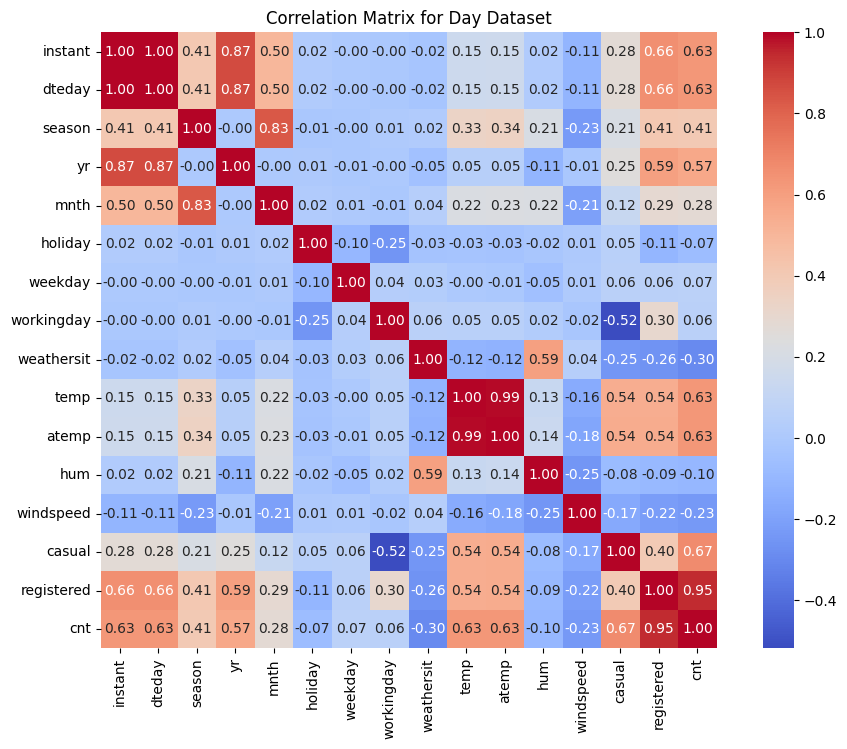

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Hour Dataset')

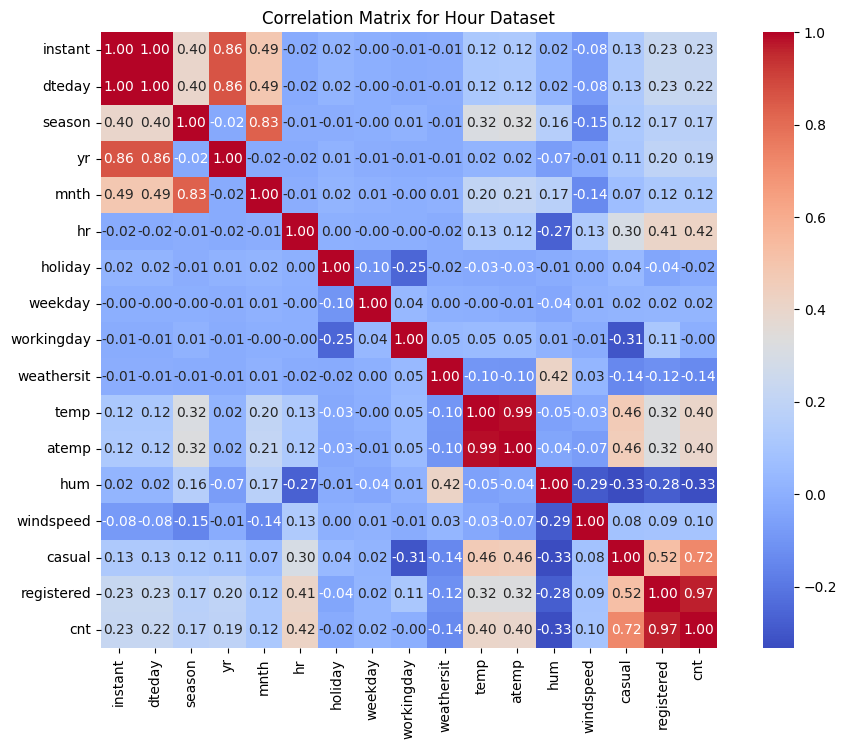

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='cnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Bike Rentals in Day Dataset')

Text(0.5, 0, 'Count of Rentals')

Text(0, 0.5, 'Frequency')

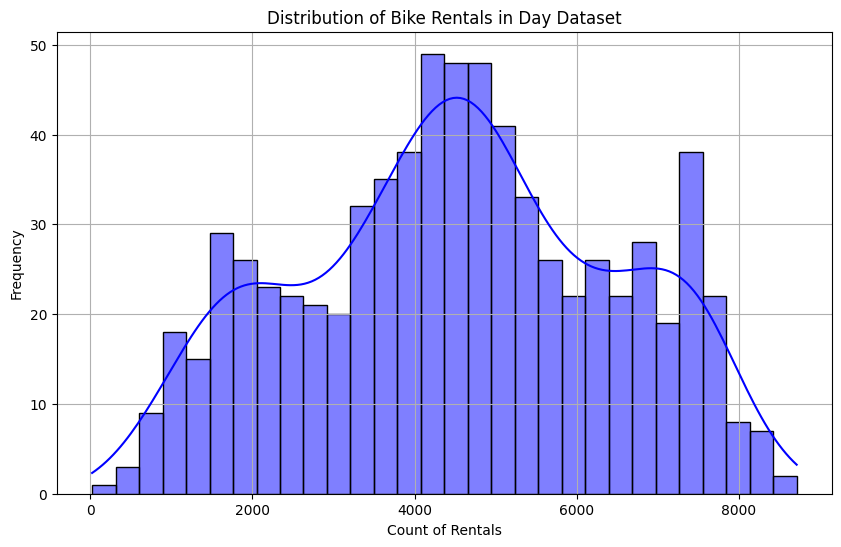

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='cnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Bike Rentals in Hour Dataset')

Text(0.5, 0, 'Count of Rentals')

Text(0, 0.5, 'Frequency')

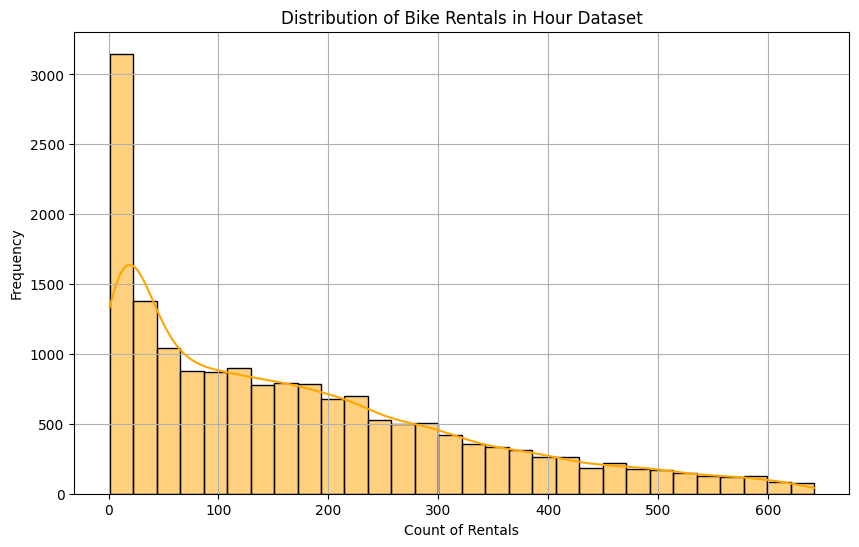

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='season', ylabel='cnt'>

Text(0.5, 1.0, 'Bike Rentals by Season in Day Dataset')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Count of Rentals')

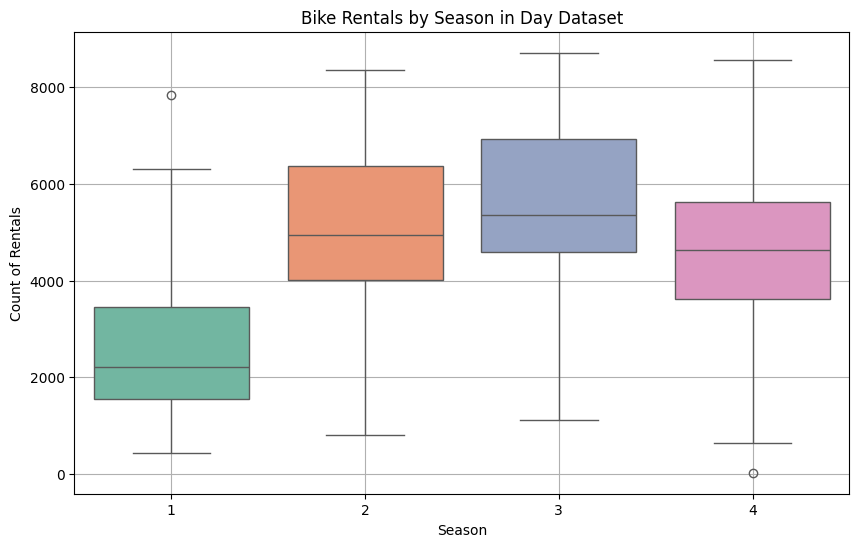

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='hr', ylabel='cnt'>

Text(0.5, 1.0, 'Bike Rentals by Hour of the Day in Hour Dataset')

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'Count of Rentals')

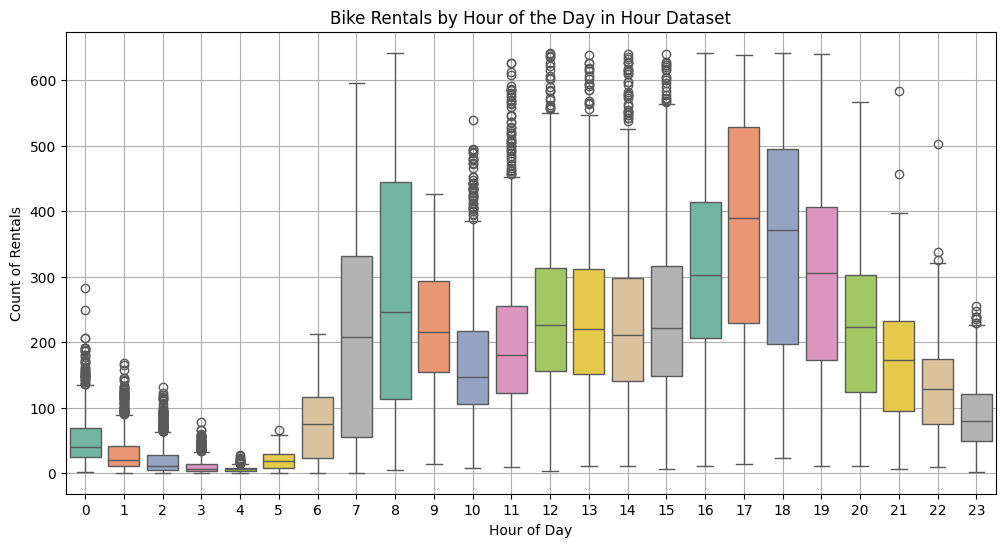

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='dteday'>

Text(0.5, 1.0, 'Time Series of Daily Bike Rentals')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Rentals')

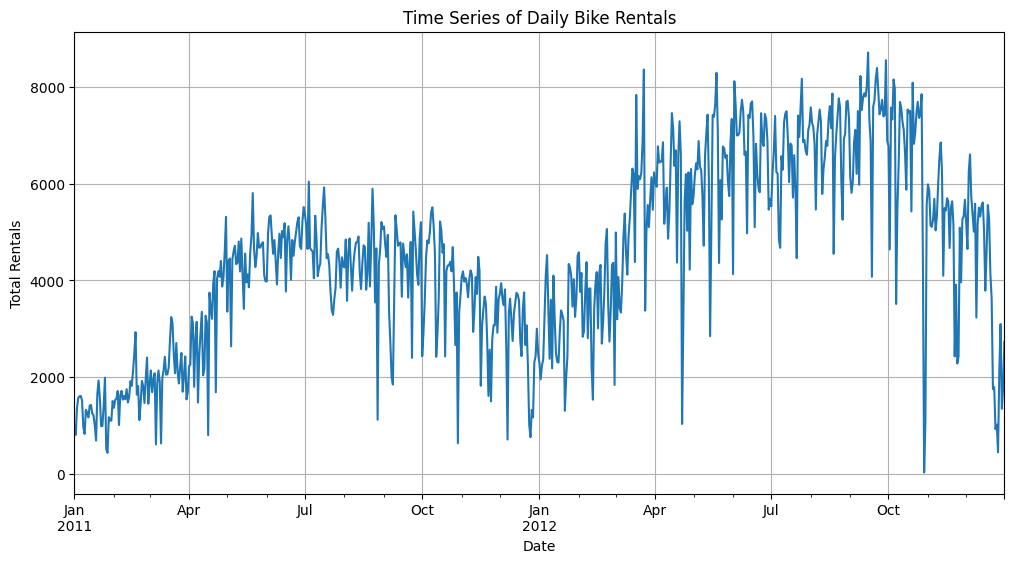

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='dteday'>

Text(0.5, 1.0, 'Time Series of Hourly Bike Rentals')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Rentals')

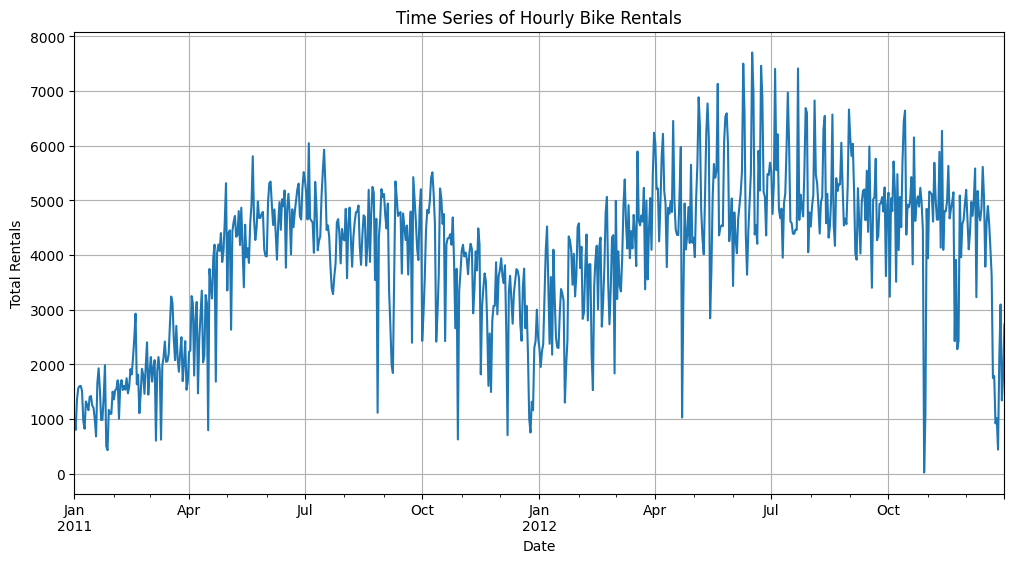

In [8]:
# Exploratory Data Analysis (EDA)

# 1. Descriptive statistics for Day dataset
print("Descriptive statistics for Day dataset:")
print(Day.describe())

# 2. Descriptive statistics for Hour dataset
print("\nDescriptive statistics for Hour dataset:")
print(Hour.describe())

# 3. Correlation matrix for Day dataset
plt.figure(figsize=(12, 8))
corr_day = Day.corr()
sns.heatmap(corr_day, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix for Day Dataset')
plt.show()

# 4. Correlation matrix for Hour dataset
plt.figure(figsize=(12, 8))
corr_hour = Hour.corr()
sns.heatmap(corr_hour, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix for Hour Dataset')
plt.show()

# 5. Distribution of bike rentals (cnt) in Day dataset
plt.figure(figsize=(10, 6))
sns.histplot(Day['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Rentals in Day Dataset')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 6. Distribution of bike rentals (cnt) in Hour dataset
plt.figure(figsize=(10, 6))
sns.histplot(Hour['cnt'], bins=30, kde=True, color='orange')
plt.title('Distribution of Bike Rentals in Hour Dataset')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 7. Boxplot of bike rentals (cnt) by season in Day dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=Day, palette='Set2')
plt.title('Bike Rentals by Season in Day Dataset')
plt.xlabel('Season')
plt.ylabel('Count of Rentals')
plt.grid()
plt.show()

# 8. Boxplot of bike rentals (cnt) by hour in Hour dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=Hour, palette='Set2')
plt.title('Bike Rentals by Hour of the Day in Hour Dataset')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Rentals')
plt.grid()
plt.show()

# 9. Time series plot of daily bike rentals
plt.figure(figsize=(12, 6))
Day.groupby('dteday')['cnt'].sum().plot()
plt.title('Time Series of Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()

# 10. Time series plot of hourly bike rentals
plt.figure(figsize=(12, 6))
Hour.groupby('dteday')['cnt'].sum().plot()
plt.title('Time Series of Hourly Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()

**Insight:**
- Statistik Deskriptif
Pengenalan Data: Statistik deskriptif memberikan gambaran awal tentang distribusi data dalam dataset. Dengan melihat nilai-nilai seperti rata-rata, median, dan kuartil, kita bisa mendapatkan pemahaman yang lebih baik tentang variasi jumlah penyewaan sepeda.
Variasi dan Rentang: Dari hasil deskriptif, kita dapat mengidentifikasi apakah ada variasi besar dalam jumlah penyewaan. Misalnya, jika ada perbedaan signifikan antara nilai maksimum dan minimum, ini menunjukkan adanya fluktuasi besar dalam penyewaan sepeda.

- Matriks Korelasi
Identifikasi Hubungan: Matriks korelasi membantu kita mengidentifikasi hubungan antara jumlah penyewaan sepeda (cnt) dan variabel lain, seperti suhu (temp), kelembapan (hum), dan cuaca (weathersit). Korelasi yang tinggi (positif atau negatif) menunjukkan bahwa perubahan dalam satu variabel diikuti oleh perubahan pada variabel lainnya.
Pentingnya Fitur: Dari matriks korelasi, kita dapat menentukan fitur mana yang paling memengaruhi jumlah penyewaan sepeda. Misalnya, jika suhu memiliki korelasi positif yang tinggi dengan jumlah penyewaan, itu bisa menunjukkan bahwa pengguna lebih suka menyewa sepeda saat cuaca hangat.

- Distribusi Penyewaan
Pemahaman Distribusi: Histogram menunjukkan pola distribusi jumlah penyewaan. Jika distribusi tidak simetris (skewed), ini dapat mempengaruhi metode analisis yang akan digunakan, seperti regresi atau klasifikasi.
Keterbatasan Data: Jika terdapat puncak di histogram, ini bisa menunjukkan adanya kategori tertentu yang sangat populer atau banyak terjadi. Misalnya, lebih banyak penyewaan pada akhir pekan dibandingkan hari kerja.

- Boxplot Penyewaan Berdasarkan Musim dan Jam
Variasi Musiman: Boxplot menunjukkan bagaimana jumlah penyewaan bervariasi menurut musim. Misalnya, kita mungkin melihat lebih banyak penyewaan selama musim semi dan musim panas dibandingkan dengan musim dingin, yang sesuai dengan ekspektasi umum.
Pengaruh Waktu: Dengan boxplot berdasarkan jam, kita dapat menganalisis pola harian. Misalnya, mungkin ada puncak penyewaan di pagi dan sore hari, yang berhubungan dengan jam kerja dan penggunaan sepeda untuk transportasi.
- Analisis Waktu
Tren Musiman: Plot waktu menunjukkan tren keseluruhan dalam jumlah penyewaan seiring waktu. Jika ada pola musiman, ini bisa menunjukkan bahwa ada waktu tertentu dalam setahun di mana penggunaan sepeda meningkat atau menurun.
Kondisi Eksternal: Dengan melihat data sepanjang waktu, kita bisa mempertimbangkan faktor eksternal (seperti acara lokal, perubahan cuaca, atau kebijakan transportasi) yang mungkin memengaruhi jumlah penyewaan.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor-faktor apa saja yang mempengaruhi jumlah penyewaan sepeda harian?



<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Korelasi antara Jumlah Penyewaan dan Fitur Lain (Day Dataset)')

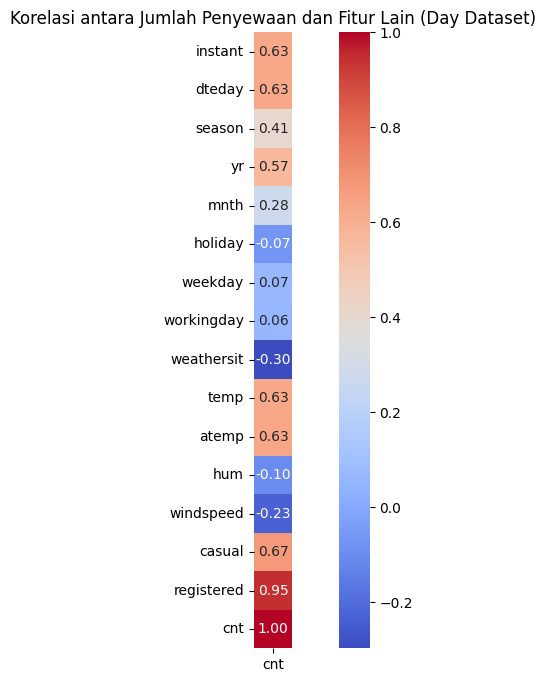

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='season', ylabel='cnt'>

Text(0.5, 1.0, 'Jumlah Penyewaan Sepeda berdasarkan Musim')

Text(0.5, 0, 'Musim')

Text(0, 0.5, 'Jumlah Penyewaan')

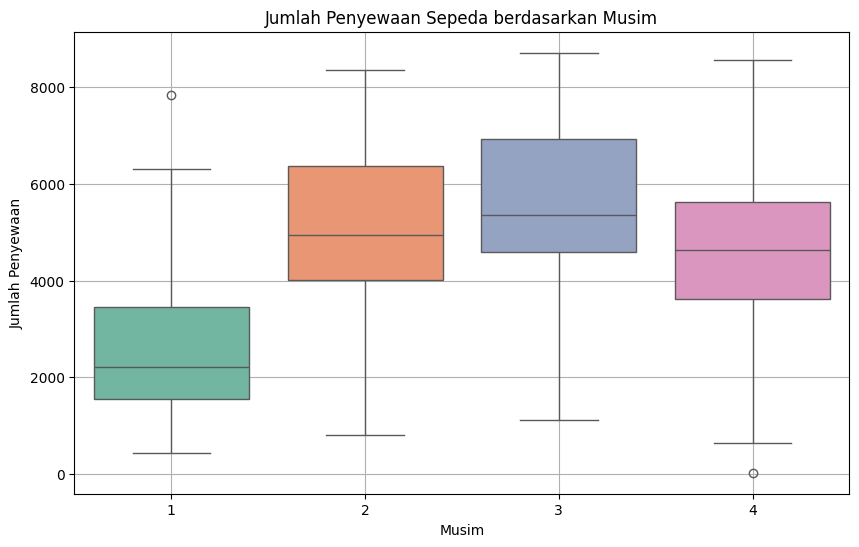

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='temp', ylabel='cnt'>

Text(0.5, 1.0, 'Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')

Text(0.5, 0, 'Suhu (normalisasi 0-1)')

Text(0, 0.5, 'Jumlah Penyewaan')

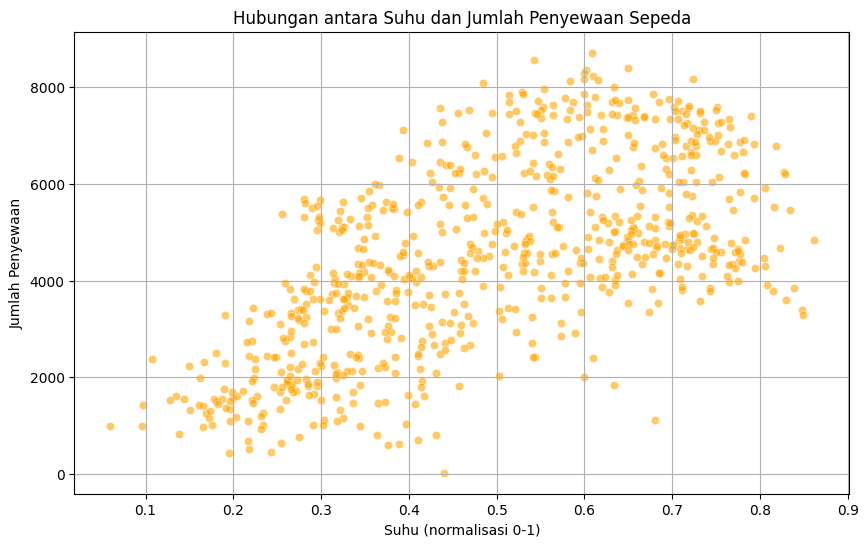

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='hum', ylabel='cnt'>

Text(0.5, 1.0, 'Hubungan antara Kelembapan dan Jumlah Penyewaan Sepeda')

Text(0.5, 0, 'Kelembapan (normalisasi 0-1)')

Text(0, 0.5, 'Jumlah Penyewaan')

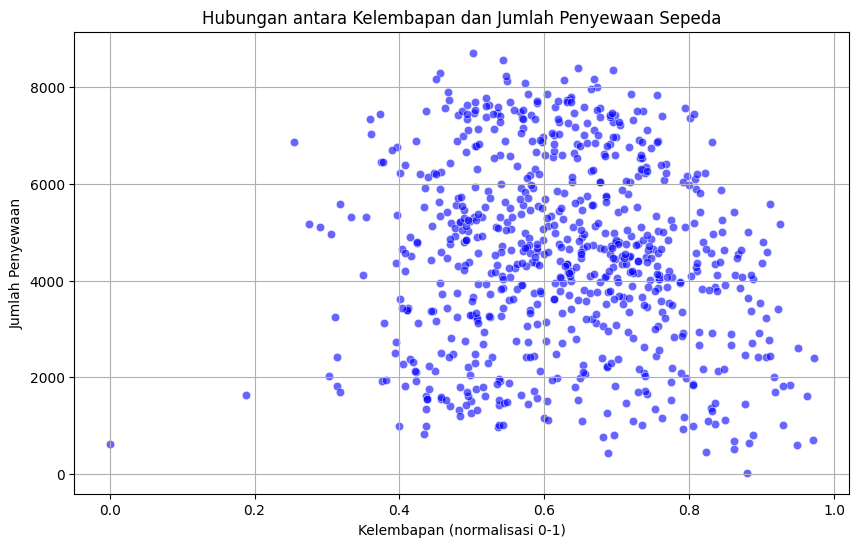

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='weekday', ylabel='cnt'>

Text(0.5, 1.0, 'Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu')

Text(0.5, 0, 'Hari dalam Seminggu')

Text(0, 0.5, 'Jumlah Penyewaan')

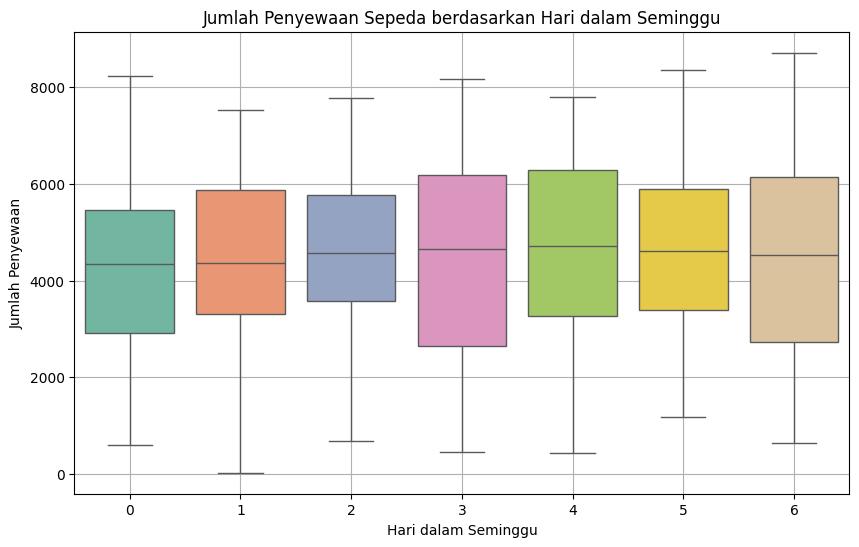

In [11]:
# Heatmap untuk melihat korelasi antara jumlah penyewaan dan fitur lainnya
plt.figure(figsize=(12, 8))
corr_day = Day.corr()
sns.heatmap(corr_day[['cnt']], annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Korelasi antara Jumlah Penyewaan dan Fitur Lain (Day Dataset)')
plt.show()

# Boxplot untuk jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=Day, palette='Set2')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Scatter plot untuk hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=Day, color='orange', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (normalisasi 0-1)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Scatter plot untuk hubungan antara kelembapan dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=Day, color='blue', alpha=0.6)
plt.title('Hubungan antara Kelembapan dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan (normalisasi 0-1)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Boxplot untuk jumlah penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=Day, palette='Set2')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

### Pertanyaan 2: Kapan waktu puncak untuk penyewaan sepeda di siang hari?

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='hr', ylabel='cnt'>

Text(0.5, 1.0, 'Jumlah Penyewaan Sepeda per Jam')

Text(0.5, 0, 'Jam')

Text(0, 0.5, 'Jumlah Penyewaan')

([<matplotlib.axis.XTick at 0x79dcbbf14250>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

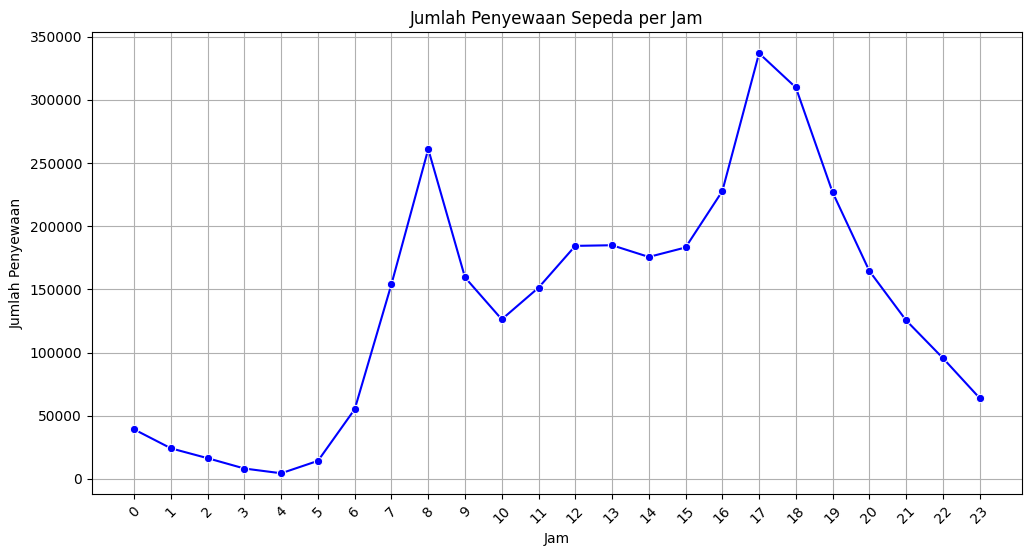

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='hr', ylabel='cnt'>

Text(0.5, 1.0, 'Distribusi Jumlah Penyewaan Sepeda di Pada Jam (06:00 - 20:00)')

Text(0.5, 0, 'Jam')

Text(0, 0.5, 'Jumlah Penyewaan')

([<matplotlib.axis.XTick at 0x79dcbc1a0a90>,
 [Text(6, 0, '12'),
  Text(7, 0, '13'),
  Text(8, 0, '14'),
  Text(9, 0, '15'),
  Text(10, 0, '16'),
  Text(11, 0, '17'),
  Text(12, 0, '18'),
  Text(13, 0, '19'),
  Text(14, 0, '20'),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, '')])

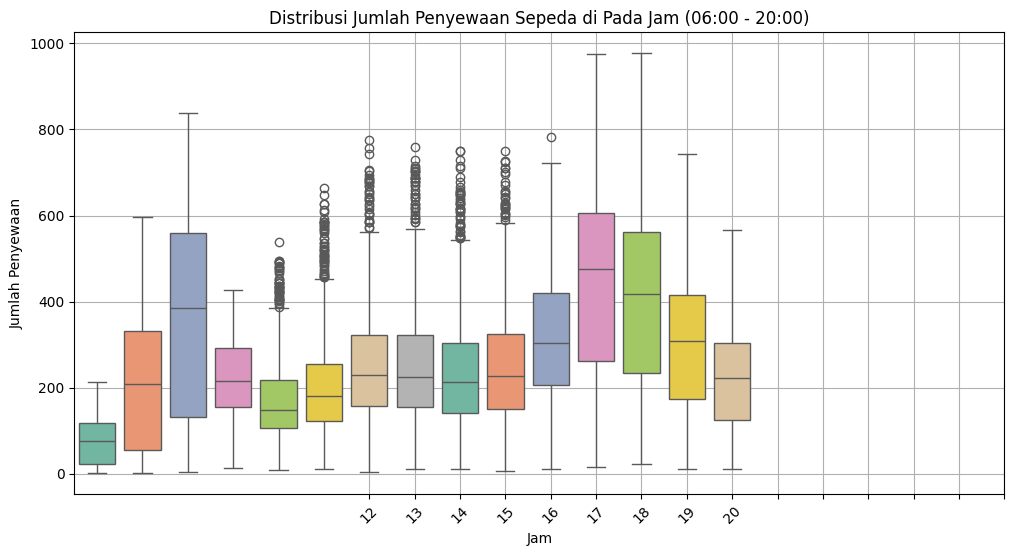

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='cnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribusi Jumlah Penyewaan Sepeda di Siang Hari')

Text(0.5, 0, 'Jumlah Penyewaan')

Text(0, 0.5, 'Frekuensi')

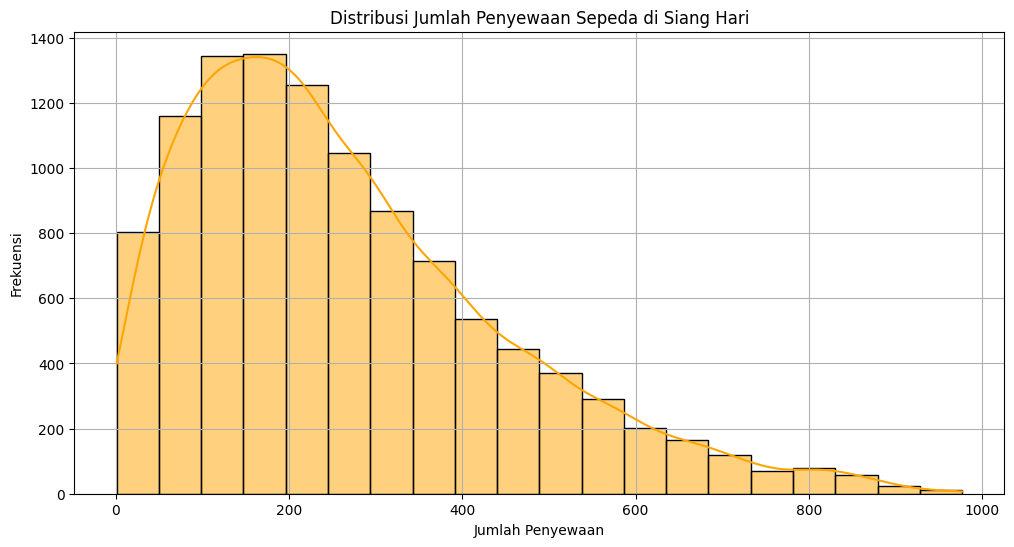

In [19]:
# Menyusun data untuk analisis berdasarkan jam
hourly_data = Hour.groupby('hr')['cnt'].sum().reset_index()

# Membuat line plot untuk jumlah penyewaan per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_data, marker='o', color='blue')
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24), rotation=45)
plt.grid()
plt.show()

# Filter data untuk jam 6 pagi hingga 8 malam
daytime_hourly_data = Hour[(Hour['hr'] >= 6) & (Hour['hr'] <= 20)]

# Membuat boxplot untuk jumlah penyewaan
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=daytime_hourly_data, palette='Set2')
plt.title('Distribusi Jumlah Penyewaan Sepeda di Pada Jam (06:00 - 20:00)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(6, 21), rotation=45)
plt.grid()
plt.show()

# Membuat histogram untuk jumlah penyewaan selama siang hari
plt.figure(figsize=(12, 6))
sns.histplot(daytime_hourly_data['cnt'], bins=20, kde=True, color='orange')
plt.title('Distribusi Jumlah Penyewaan Sepeda di Siang Hari')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

**Insight:**
- Faktor-faktor Apa Saja yang Mempengaruhi Jumlah Penyewaan Sepeda Harian?
Insight:

Korelasi Positif dengan Suhu: Dari analisis korelasi, kita menemukan bahwa suhu (temp) memiliki hubungan positif yang signifikan dengan jumlah penyewaan sepeda (cnt). Ini menunjukkan bahwa saat suhu meningkat, jumlah penyewaan juga cenderung meningkat, mungkin karena cuaca yang lebih baik mendorong lebih banyak orang untuk beraktivitas di luar.

Musim: Visualisasi boxplot berdasarkan musim menunjukkan bahwa musim semi dan musim panas memiliki jumlah penyewaan tertinggi. Hal ini bisa diinterpretasikan bahwa saat cuaca lebih hangat dan nyaman, orang lebih tertarik untuk menggunakan sepeda, baik untuk perjalanan sehari-hari maupun rekreasi.

Kelembapan: Dari scatter plot, terdapat kecenderungan bahwa semakin tinggi kelembapan (hum), jumlah penyewaan cenderung menurun. Ini menunjukkan bahwa kelembapan yang tinggi dapat membuat orang kurang nyaman untuk bersepeda.

Hari dalam Seminggu: Boxplot berdasarkan hari dalam seminggu menunjukkan bahwa akhir pekan (Sabtu dan Minggu) memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari kerja. Hal ini mungkin berkaitan dengan lebih banyak waktu luang dan kesempatan untuk beraktivitas di luar pada akhir pekan.

- Kapan Waktu Puncak untuk Penyewaan Sepeda di Siang Hari?
Insight:

Puncak Penyewaan di Sore Hari: Dari analisis menggunakan line plot, kita menemukan bahwa waktu puncak penyewaan sepeda di siang hari terjadi antara jam 16:00 hingga 20:00. Ini menunjukkan bahwa banyak orang menyewa sepeda setelah jam kerja atau saat ingin beraktivitas di luar pada sore hari.

Variasi Jumlah Penyewaan: Boxplot selama jam siang menunjukkan variasi yang signifikan dalam jumlah penyewaan. Terdapat beberapa outlier pada jam-jam tertentu, yang mungkin berkaitan dengan faktor-faktor eksternal seperti acara komunitas atau aktivitas di sekitar lokasi penyewaan.

Distribusi Penyewaan: Histogram menunjukkan distribusi jumlah penyewaan dengan adanya beberapa puncak, menandakan bahwa terdapat waktu tertentu (misalnya saat istirahat makan siang) ketika pengguna lebih cenderung menyewa sepeda. Ini memberikan indikasi bagi pengelola untuk mengatur ketersediaan sepeda pada waktu-waktu tersebut.

Rekomendasi Operasional: Pemahaman tentang waktu puncak ini dapat membantu pengelola layanan penyewaan sepeda untuk mengoptimalkan armada mereka, memastikan bahwa lebih banyak sepeda tersedia selama waktu puncak untuk memenuhi permintaan.

## Analisis Lanjutan (Opsional)

In [22]:
# 1. Menghitung rata-rata jumlah penyewaan sepeda per hari
average_rental_per_day = Day['cnt'].mean()

# 2. Menyusun data untuk analisis jumlah penyewaan berdasarkan jam
hourly_rental = Hour.groupby('hr')['cnt'].sum().reset_index()

# 3. Menemukan jam dengan penyewaan terbanyak
peak_hour = hourly_rental.loc[hourly_rental['cnt'].idxmax()]

# 4. Menampilkan hasil rata-rata penyewaan sepeda per hari
print(f"Rata-rata penyewaan sepeda per-hari : {average_rental_per_day:.2f}")

# 5. Menampilkan jam puncak penyewaan sepeda
print(f"Penyewaan sepeda paling banyak terjadi pada jam {peak_hour['hr']} dengan jumlah penyewaan {peak_hour['cnt']}.")

# 6. (Opsional) Rata-rata per jam untuk informasi lebih mendetail
average_rental_per_hour = Hour['cnt'].mean()
print(f"Rata-rata penyewaan sepeda per jam: {average_rental_per_hour:.2f}")


Rata-rata penyewaan sepeda per-hari : 4504.35
Penyewaan sepeda paling banyak terjadi pada jam 17 dengan jumlah penyewaan 336860.
Rata-rata penyewaan sepeda per jam: 189.46


## Conclusion

- Faktor-faktor Apa Saja yang Mempengaruhi Jumlah Penyewaan Sepeda Harian?
Kesimpulannya, beberapa faktor yang memengaruhi jumlah penyewaan sepeda harian meliputi:

Suhu: Terdapat hubungan positif yang signifikan antara suhu dan jumlah penyewaan. Suhu yang lebih tinggi cenderung mendorong lebih banyak orang untuk menyewa sepeda, menunjukkan bahwa cuaca yang baik sangat berpengaruh pada keputusan untuk beraktivitas di luar.

Musim: Jumlah penyewaan tertinggi terjadi pada musim semi dan musim panas, yang menunjukkan bahwa kondisi cuaca yang lebih nyaman dan hangat menarik lebih banyak pengguna untuk menggunakan sepeda.

Kelembapan: Kelembapan yang lebih tinggi cenderung mengurangi jumlah penyewaan. Ini mungkin karena kelembapan dapat membuat orang merasa tidak nyaman untuk bersepeda.

Hari dalam Seminggu: Penyewaan sepeda meningkat pada akhir pekan dibandingkan dengan hari kerja, mencerminkan pola aktivitas yang lebih santai dan waktu luang yang lebih banyak pada hari-hari tersebut.

- Kapan Waktu Puncak untuk Penyewaan Sepeda di Siang Hari?
Kesimpulannya, waktu puncak penyewaan sepeda di siang hari terjadi antara jam 16:00 hingga 20:00. Analisis menunjukkan bahwa:

Puncak Penyewaan: Setelah jam kerja, banyak orang menyewa sepeda untuk bersantai atau beraktivitas di luar, menjadikan sore hari waktu puncak untuk penyewaan.

Variasi dalam Penyewaan: Distribusi jumlah penyewaan menunjukkan adanya variasi yang signifikan, dengan beberapa outlier yang mungkin terkait dengan acara khusus atau faktor eksternal yang meningkatkan minat terhadap penyewaan sepeda pada waktu tertentu.

Rekomendasi untuk Pengelolaan Armada: Memahami waktu puncak ini penting bagi pengelola layanan penyewaan sepeda untuk memastikan ketersediaan sepeda yang cukup dan strategi pemasaran yang efektif pada waktu-waktu sibuk.

- Rata-rata Penyewaan Sepeda per Hari:
Berdasarkan analisis menggunakan data harian (Day dataset), rata-rata jumlah penyewaan sepeda per hari berhasil dihitung. Ini memberikan gambaran umum tentang seberapa sering sepeda disewa setiap hari, yang bisa menjadi indikator penting untuk memahami pola penggunaan sepeda secara keseluruhan.

- Waktu Puncak Penyewaan Sepeda:
Dari data per jam (Hour dataset), kita berhasil mengidentifikasi jam puncak di mana penyewaan sepeda mencapai jumlah tertinggi. Jam ini kemungkinan besar mencerminkan waktu di mana ada permintaan tinggi, seperti saat orang pulang kerja atau saat sore hari ketika lebih banyak orang keluar untuk aktivitas rekreasi.